In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


EXPLORING THE DATASET

In [5]:
data.shape

(440, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [8]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
data['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [10]:
data['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

DATA PREPROCESSING

In [11]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There are no missing values present in the dataset

OUTLIER DETECTION

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78d05a2320>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78d05a2860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78d05a2080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78d05a2da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78d05a3040>],
 'means': []}

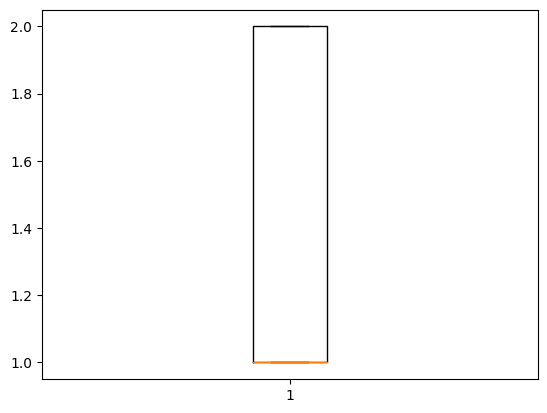

In [12]:
plt.boxplot(data['Channel'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ce49a170>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ce49a6b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ce499ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ce49abf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ce49ae90>],
 'means': []}

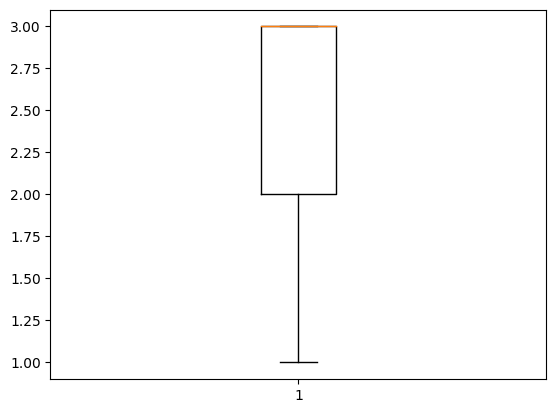

In [13]:
plt.boxplot(data['Region'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ce322b90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ce3230d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ce322a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ce323610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ce3238b0>],
 'means': []}

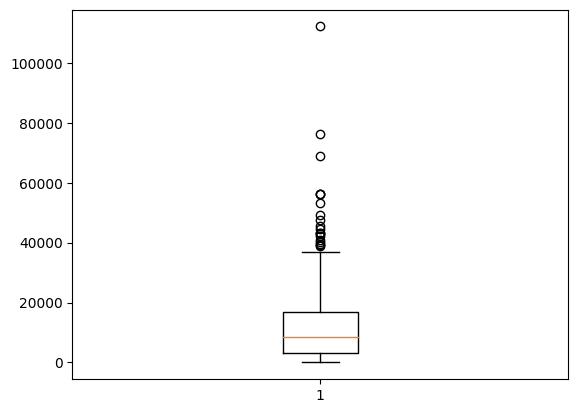

In [14]:
plt.boxplot(data['Fresh'])


In [15]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ce395de0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ce396200>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ce395b40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ce396740>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ce3969e0>],
 'means': []}

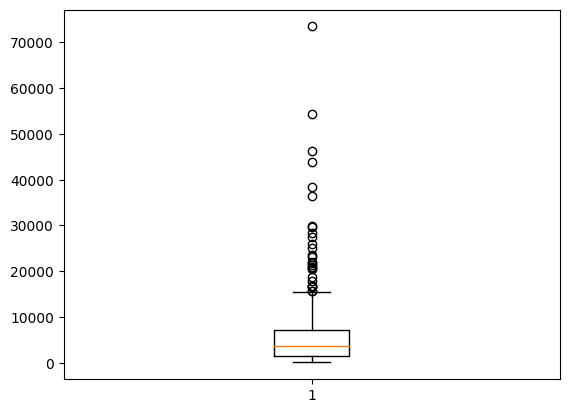

In [16]:
plt.boxplot(data['Milk'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ce2199f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ce219f30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ce219750>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ce21a470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ce21a710>],
 'means': []}

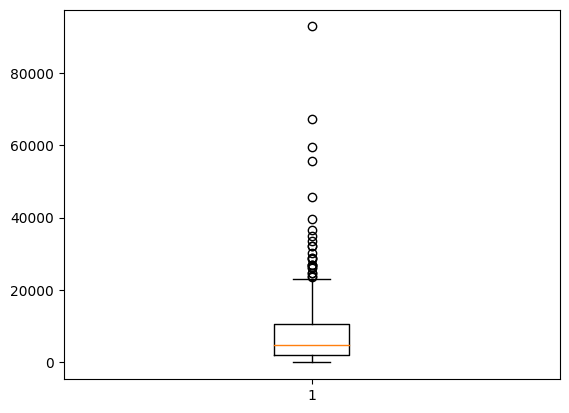

In [17]:
plt.boxplot(data['Grocery'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ce263e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ce298280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ce263b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ce2987c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ce298a60>],
 'means': []}

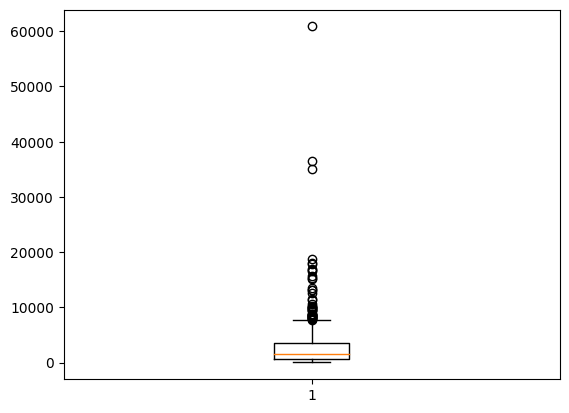

In [18]:
plt.boxplot(data['Frozen'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ce2df400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ce2df820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ce2df160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ce2dfd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ce2dffa0>],
 'means': []}

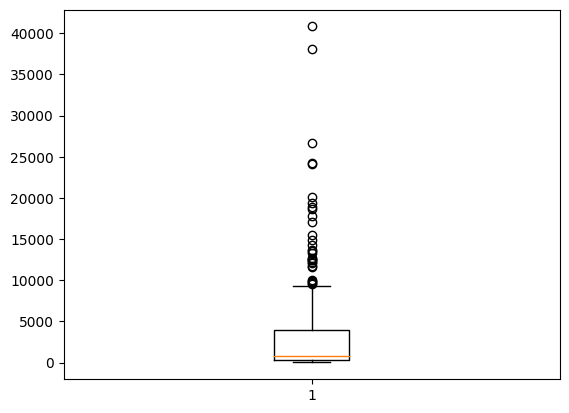

In [19]:
plt.boxplot(data['Detergents_Paper'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ce18c1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ce18c700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ce157fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ce18cc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ce18cdf0>],
 'means': []}

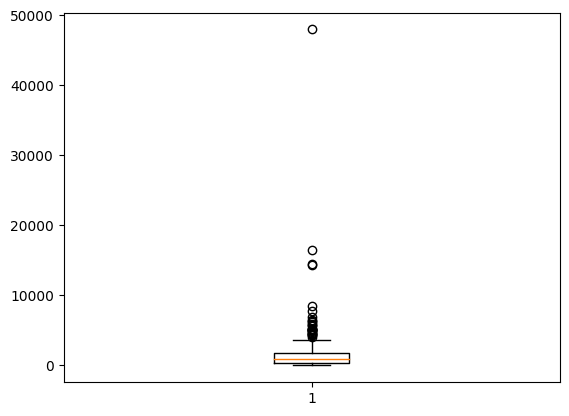

In [20]:
plt.boxplot(data['Delicassen'])

FEATURE SCALING

In [21]:
data = data.drop(data[['Channel' , 'Region']], axis = 1)


In [22]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


HANDLING OUTLIERS

In [23]:
Q1a = data['Fresh'].quantile(0.25)
Q2a = data['Fresh'].quantile(0.5)
Q3a = data['Fresh'].quantile(0.75)

In [24]:
iqr1 = Q3a - Q1a

In [25]:
low_1 = Q1a - (1.5*iqr1)
up_1 = Q3a + (1.5*iqr1)

In [26]:
print(low_1,up_1)

-17581.25 37642.75


In [27]:
data[(data['Fresh']<low_1) | (data['Fresh']>up_1)].index

Int64Index([ 29,  39,  47,  52,  87, 103, 125, 129, 176, 181, 239, 258, 259,
            282, 284, 285, 289, 370, 377, 436],
           dtype='int64')

In [28]:
print(data['Fresh'].skew())

2.561322751927935


In [29]:
#Flooring and capping method for treating outliers
print(data['Fresh'].quantile(0.10))
print(data['Fresh'].quantile(0.90))

915.6000000000001
27090.500000000004


In [30]:
data["Fresh"] = np.where(data["Fresh"] <915.60, 915.60,data['Fresh'])
data["Fresh"] = np.where(data["Fresh"] >27090.50, 27090.50,data['Fresh'])
print(data['Fresh'].skew())

0.6810613617028577


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ce1eac20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ce1eb160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ce1ea980>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ce1eb6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ce1eb940>],
 'means': []}

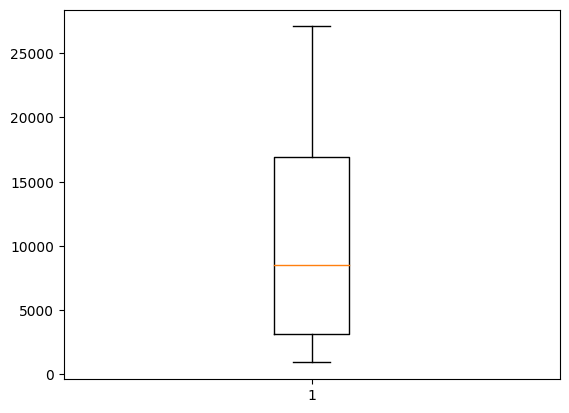

In [31]:
plt.boxplot(data['Fresh'])

In [32]:
Q1b = data['Milk'].quantile(0.25)
Q2b = data['Milk'].quantile(0.5)
Q3b = data['Milk'].quantile(0.75)

In [33]:
iqr2 = Q3b - Q1b

In [34]:
low_2 = Q1b - (1.5 *iqr2)
up_2 = Q3b + (1.5*iqr2)

In [35]:
print(low_2,up_2)

-6952.875 15676.125


In [36]:
data[(data['Milk']<low_2) | (data['Milk']>up_2)].index

Int64Index([ 23,  28,  38,  45,  47,  49,  56,  61,  65,  85,  86,  92, 109,
            163, 171, 181, 183, 211, 216, 251, 254, 265, 309, 319, 325, 358,
            384, 427],
           dtype='int64')

In [37]:
print(data['Milk'].skew())

4.053754849210881


In [38]:
print(data['Milk'].quantile(0.10))
print(data['Milk'].quantile(0.90))

889.8000000000001
12229.900000000001


In [39]:
data['Milk'] = np.where(data['Milk'] <889.80, 889.80,data['Milk'])
data['Milk'] = np.where(data['Milk'] >12229.90, 12229.90,data['Milk'])
print(data['Milk'].skew())

0.7956068295411343


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ce06a980>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ce06ada0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ce06a6e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ce06b2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ce06b580>],
 'means': []}

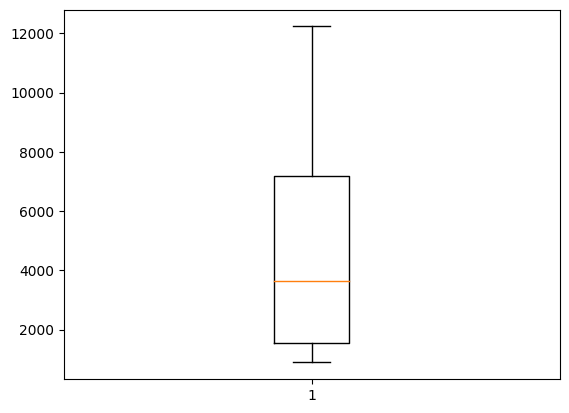

In [40]:
plt.boxplot(data['Milk'])

In [41]:
Q1c = data['Grocery'].quantile(0.25)
Q2c = data['Grocery'].quantile(0.5)
Q3c = data['Grocery'].quantile(0.75)

In [42]:
iqr3 = Q3c - Q1c

In [43]:
low_3 = Q1c -(1.5 *iqr3)
up_3 = Q3c +(1.5 *iqr3)

In [44]:
print(low_3,up_3)

-10601.125 23409.875


In [45]:
data[(data['Grocery'] < low_3) | (data['Grocery'] > up_3)].index

Int64Index([ 28,  43,  47,  49,  56,  61,  65,  77,  85,  86,  92, 109, 145,
            163, 201, 205, 211, 216, 251, 304, 331, 333, 343, 437],
           dtype='int64')

In [46]:
print(data['Grocery'].skew())

3.5874286903915453


In [47]:
print(data['Grocery'].quantile(0.10))
print(data['Grocery'].quantile(0.90))

1381.9
18910.100000000006


In [48]:
data['Grocery'] = np.where(data['Grocery'] < 1381.9,1381.9,data['Grocery'])
data['Grocery'] = np.where(data['Grocery'] > 18910.10,18910.10,data['Grocery'])
print(data['Grocery'].skew())

0.9403441101490462


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78ce0f1c60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78ce0f21a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78ce0f1ae0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78ce0f26e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78ce0f2980>],
 'means': []}

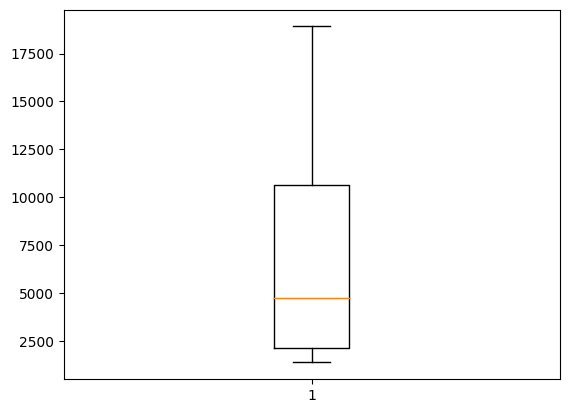

In [49]:
plt.boxplot(data['Grocery'])

In [50]:
Q1d = data['Frozen'].quantile(0.25)
Q2d = data['Frozen'].quantile(0.5)
Q3d = data['Frozen'].quantile(0.75)

In [51]:
iqr4 = Q3d - Q1d

In [52]:
low_4 = Q1d -(1.5 *iqr4)
up_4= Q3d +(1.5 *iqr4)

In [53]:
print(low_4,up_4)

-3475.75 7772.25


In [54]:
data[(data['Frozen'] < low_4) | (data['Frozen'] > up_4)].index

Int64Index([ 22,  39,  40,  47,  70,  72,  73,  88,  91,  93, 103, 112, 125,
            126, 143, 181, 183, 195, 196, 230, 240, 265, 277, 283, 284, 287,
            310, 325, 328, 334, 337, 338, 339, 371, 381, 393, 401, 406, 413,
            425, 427, 431, 435],
           dtype='int64')

In [55]:
print(data['Frozen'].skew())

5.9079856924559575


In [56]:
print(data['Frozen'].quantile(0.10))
print(data['Frozen'].quantile(0.90))

281.30000000000007
7545.300000000004


In [57]:
data['Frozen'] = np.where(data['Frozen'] < 281.30,281.30,data['Frozen'])
data['Frozen'] = np.where(data['Frozen'] > 7545.30,7545.30,data['Frozen'])
print(data['Frozen'].skew())

1.1024124815127843


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78cdf6e110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78cdf6e650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78cdf6de70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78cdf6eb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78cdf6ee30>],
 'means': []}

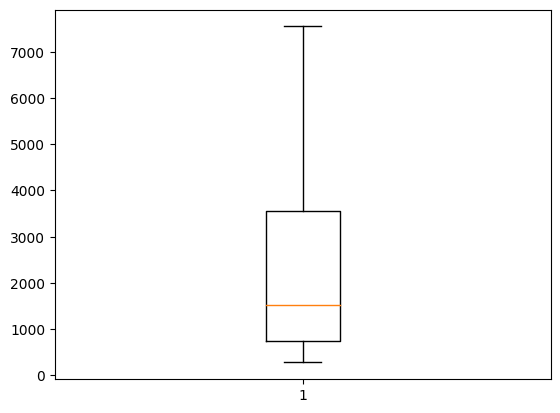

In [58]:
plt.boxplot(data['Frozen'])

In [59]:
Q1e = data['Detergents_Paper'].quantile(0.25)
Q2e = data['Detergents_Paper'].quantile(0.5)
Q3e = data['Detergents_Paper'].quantile(0.75)

In [60]:
iqr5 = Q3e - Q1e

In [61]:
low_5 = Q1e -(1.5 *iqr5)
up_5= Q3e +(1.5 *iqr5)

In [62]:
print(low_5,up_5)

-5241.125 9419.875


In [63]:
data[(data['Detergents_Paper'] < low_5) | (data['Detergents_Paper'] > up_5)].index

Int64Index([ 43,  47,  49,  56,  61,  65,  77,  85,  86,  92, 145, 155, 163,
            173, 200, 201, 209, 211, 216, 251, 303, 304, 312, 319, 331, 333,
            343, 349, 351, 437],
           dtype='int64')

In [64]:
print(data['Detergents_Paper'].skew())

3.6318506306913645


In [65]:
print(data['Detergents_Paper'].quantile(0.10))
print(data['Detergents_Paper'].quantile(0.90))

99.60000000000002
7438.300000000003


In [66]:
data['Detergents_Paper'] = np.where(data['Detergents_Paper'] < 99.60,99.60,data['Detergents_Paper'])
data['Detergents_Paper'] = np.where(data['Detergents_Paper'] > 7438.30,7438.30,data['Detergents_Paper'])
print(data['Detergents_Paper'].skew())

1.0320840429934703


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78cdfe3160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78cdfe36a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78cdfe2ec0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78cdfe3be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78cdfe3e80>],
 'means': []}

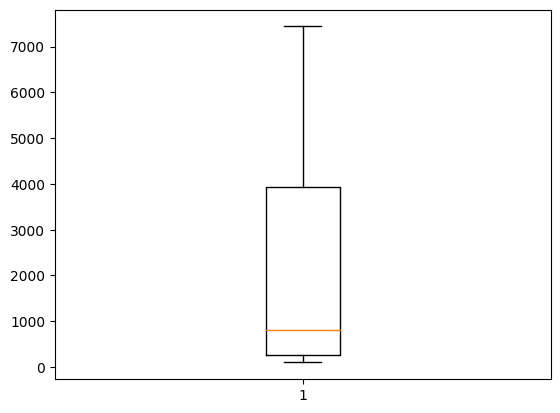

In [67]:
plt.boxplot(data['Detergents_Paper'])

In [68]:
Q1f = data['Delicassen'].quantile(0.25)
Q2f = data['Delicassen'].quantile(0.5)
Q3f = data['Delicassen'].quantile(0.75)

In [69]:
iqr6 = Q3f - Q1f

In [70]:
low_6 = Q1f -(1.5 *iqr6)
up_6= Q3f +(1.5 *iqr6)

In [71]:
print(low_6,up_6)

-1709.75 3938.25


In [72]:
data[(data['Delicassen'] < low_6) | (data['Delicassen'] > up_6)].index

Int64Index([  2,   4,  17,  22,  23,  24,  28,  36,  40,  45,  47,  71,  87,
             92, 145, 171, 181, 183, 202, 218, 251, 325, 358, 372, 384, 409,
            411],
           dtype='int64')

In [73]:
print(data['Delicassen'].skew())

11.151586478906117


In [74]:
print(data['Delicassen'].quantile(0.10))
print(data['Delicassen'].quantile(0.90))

180.8
2945.9000000000005


In [75]:
data['Delicassen'] = np.where(data['Delicassen'] < 180.8,180.8,data['Delicassen'])
data['Delicassen'] = np.where(data['Delicassen'] >2945.90,2945.90,data['Delicassen'])
print(data['Delicassen'].skew())

0.7022473937820296


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78cde3b160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78cde3b6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78cde3aec0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78cde3b670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78cde3b8e0>],
 'means': []}

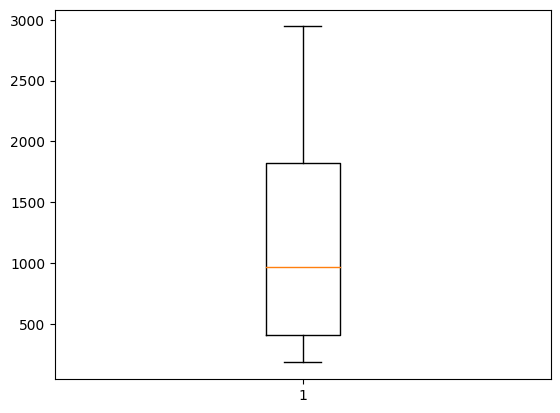

In [76]:
plt.boxplot(data['Delicassen'])

In [77]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669.0,9656.0,7561.0,281.3,2674.0,1338.0
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,6353.0,8808.0,7684.0,2405.0,3516.0,2945.9
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,22615.0,5410.0,7198.0,3915.0,1777.0,2945.9


SCALING

In [78]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

In [79]:
data.loc[:,['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']] = mn.fit_transform(data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])

In [80]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.449033,0.773027,0.352523,0.000000,0.350798,0.418502
1,0.234629,0.786607,0.467025,0.203841,0.435145,0.576905
2,0.207733,0.698248,0.359541,0.292360,0.465532,1.000000
3,0.471803,0.027002,0.161973,0.842883,0.055514,0.581245
4,0.829016,0.398603,0.331814,0.500234,0.228569,1.000000


K-MEANS CLUSTERING MODEL

In [81]:
from sklearn.cluster import KMeans

In [82]:
wcss = []
for i in range(1,11):
  km =  KMeans(n_clusters = i,n_init= 10)
  km.fit(data)
  css = km.inertia_
  wcss.append(css)


In [83]:
wcss

[290.947613629188,
 182.81268847217325,
 143.71778206498342,
 125.33717809471482,
 111.88994734851309,
 101.12039079906913,
 91.77438633821319,
 84.88920393903683,
 79.21827643697449,
 75.52708263405881]

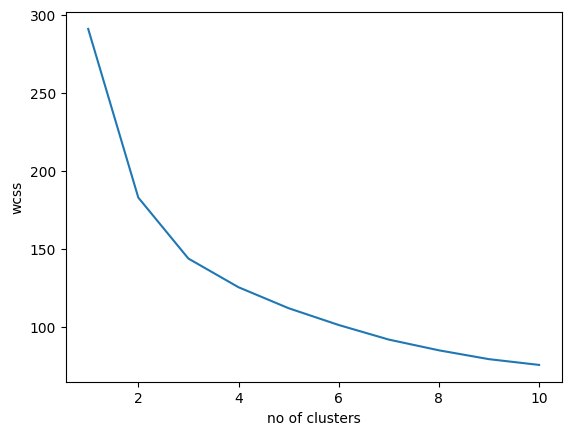

In [84]:
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [85]:
# from the above figure it is observed that optimum number of clusters is 3

In [120]:
km =KMeans(n_clusters = 3,n_init= 10)

In [121]:
km.fit(data)

KMeans(n_clusters=3, n_init=10)

In [122]:
y_km = km.predict(data)

In [123]:
y_km

array([2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       1, 2, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1,
       0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1,

In [124]:
pd.Series(y_km).value_counts()

0    207
2    122
1    111
dtype: int64

In [125]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(data,y_km)
print(silhouette)

0.31604534016360974


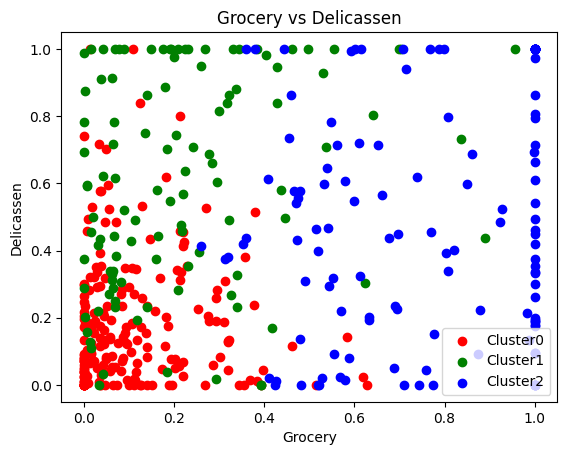

In [129]:
colors = ['r','g','b','c']
for i in range(max(y_km)+1):
  cluster_data = data[y_km==i]
  plt.scatter(cluster_data['Grocery'],
              cluster_data['Delicassen'],
              c=colors[i],
              label=f'Cluster{i}')
plt.xlabel('Grocery')
plt.ylabel('Delicassen')
plt.title('Grocery vs Delicassen')
plt.legend()

AGGLOMERATIVE CLUSTERING

In [131]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [137]:
mergings = linkage(data,method = 'ward')

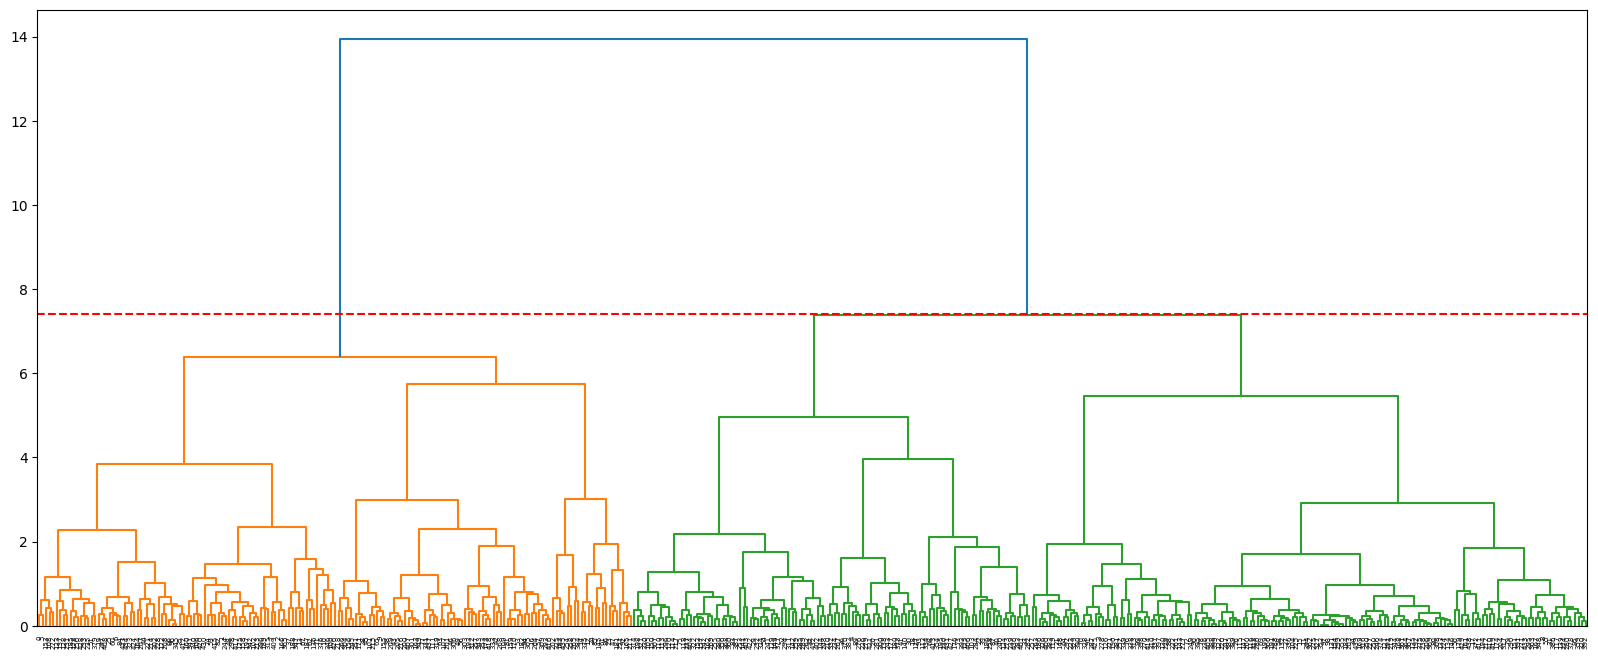

In [149]:
plt.figure(figsize =(20,8))
dendrogram(mergings)
plt.axhline(7.4,color='red',linestyle = '--')
plt.show()

In [150]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,metric = 'euclidean',linkage = 'ward')

In [151]:
y_hc = hc.fit_predict(data)

In [152]:
y_hc

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [153]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(data,y_hc)
print(silhouette)

0.31572615803292053


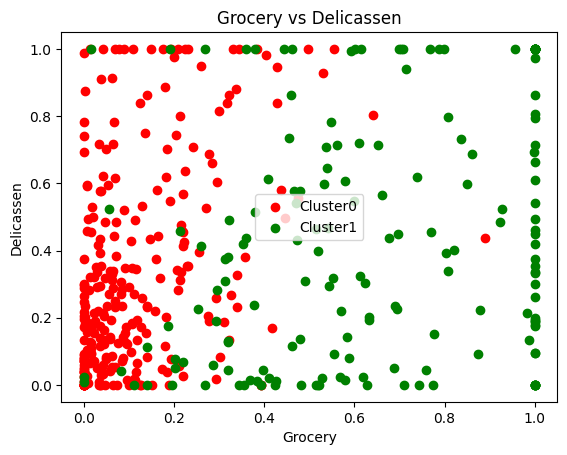

In [154]:
colors = ['r','g','b','c']
for i in range(max(y_hc)+1):
  cluster_data = data[y_hc==i]
  plt.scatter(cluster_data['Grocery'],
              cluster_data['Delicassen'],
              c=colors[i],
              label=f'Cluster{i}')
plt.xlabel('Grocery')
plt.ylabel('Delicassen')
plt.title('Grocery vs Delicassen')
plt.legend()

PRINCIPAL COMPOUND ANALYSIS

In [155]:
from sklearn.decomposition import PCA

In [156]:
pca = PCA()

In [157]:
pc_array = pca.fit_transform(data)

In [158]:
pc_array.shape

(440, 6)

In [159]:
pc_array = pd.DataFrame(pc_array,columns = ["pc1","pc2","pc3","pc4","pc5","pc6"])

In [160]:
pc_array


,pc1,pc2,pc3,pc4,pc5,pc6
0,0.318484,-0.038722,-0.264978,-0.021079,0.328995,-0.081201
1,0.470558,0.035474,-0.017619,0.163407,0.241202,-0.042984
2,0.458342,0.284575,-0.047053,0.504353,0.108591,-0.147648
3,-0.435660,0.443555,0.287221,0.127963,-0.194096,0.042985
4,0.037512,0.744492,-0.240041,0.178762,-0.061051,-0.024128
...,...,...,...,...,...,...
435,0.350490,1.104259,0.185607,-0.278981,0.401009,0.379981
436,-0.541128,0.724317,-0.258892,0.032045,-0.144974,-0.089841
437,1.203039,0.119098,-0.251200,-0.174498,0.013867,-0.018359
438,-0.347944,0.047787,-0.283895,0.401097,-0.033144,-0.004565


In [161]:
pc_array.corr().round()

,pc1,pc2,pc3,pc4,pc5,pc6
pc1,1.0,0.0,0.0,0.0,0.0,-0.0
pc2,0.0,1.0,0.0,0.0,0.0,-0.0
pc3,0.0,0.0,1.0,0.0,-0.0,0.0
pc4,0.0,0.0,0.0,1.0,0.0,-0.0
pc5,0.0,0.0,-0.0,0.0,1.0,-0.0
pc6,-0.0,-0.0,0.0,-0.0,-0.0,1.0


In [162]:
pca.explained_variance_

array([0.31187437, 0.17028505, 0.06956207, 0.06664096, 0.03184904,
       0.01253933])

In [163]:
pca.explained_variance_ratio_*100

array([47.05756005, 25.69367603, 10.49596133, 10.05520654,  4.805583  ,
        1.89201306])

In [165]:
47.057560058+25.69367603+10.49596133+10.05520654 + 4.805583 + 1.89201306

100.000000018

In [166]:
pca1 = PCA(n_components=5)

In [167]:
pc_array1 = pca1.fit_transform(data)

In [168]:
pc_array1.shape

(440, 5)

In [169]:
pc_array1 = pd.DataFrame(pc_array,columns = ["pc1","pc2","pc3","pc4","pc5"])
pc_array1

,pc1,pc2,pc3,pc4,pc5
0,0.318484,-0.038722,-0.264978,-0.021079,0.328995
1,0.470558,0.035474,-0.017619,0.163407,0.241202
2,0.458342,0.284575,-0.047053,0.504353,0.108591
3,-0.435660,0.443555,0.287221,0.127963,-0.194096
4,0.037512,0.744492,-0.240041,0.178762,-0.061051
...,...,...,...,...,...
435,0.350490,1.104259,0.185607,-0.278981,0.401009
436,-0.541128,0.724317,-0.258892,0.032045,-0.144974
437,1.203039,0.119098,-0.251200,-0.174498,0.013867
438,-0.347944,0.047787,-0.283895,0.401097,-0.033144


In [170]:
pca1.explained_variance_

array([0.31187437, 0.17028505, 0.06956207, 0.06664096, 0.03184904])

In [171]:
pca1.explained_variance_ratio_*100

array([47.05756005, 25.69367603, 10.49596133, 10.05520654,  4.805583  ])

In [172]:
47.05756005+25.69367603+10.49596133+10.05520654+4.805583

98.10798695